# Step 3: 基于卡方分箱法对变量进行分箱

In [1]:
import os
import pandas as pd
import numpy as np
import numbers

In [2]:
# 我们后续是对allfeature进行分析的，所以可以把原始train数据集先处理了

In [3]:
path = os.path.abspath('./')

trainData = pd.read_csv(path+'/allData_1.csv',header = 0, encoding='gbk',dtype=object)

allFeatures = list(trainData.columns)
allFeatures.remove('ListingInfo')
allFeatures.remove('target')
allFeatures.remove('Idx')

In [4]:
numerical_col = ["WeblogInfo_1","WeblogInfo_2","WeblogInfo_3","WeblogInfo_4","WeblogInfo_5","WeblogInfo_6","WeblogInfo_7","WeblogInfo_8","WeblogInfo_9","WeblogInfo_10","WeblogInfo_11","WeblogInfo_12","WeblogInfo_13","WeblogInfo_14","WeblogInfo_15","WeblogInfo_16","WeblogInfo_17","WeblogInfo_18","UserInfo_10","UserInfo_18","WeblogInfo_23","WeblogInfo_24","WeblogInfo_25","WeblogInfo_26","WeblogInfo_27","WeblogInfo_28","WeblogInfo_29","WeblogInfo_30","WeblogInfo_31","WeblogInfo_32","WeblogInfo_33","WeblogInfo_34","WeblogInfo_35","WeblogInfo_36","WeblogInfo_37","WeblogInfo_38","WeblogInfo_39","WeblogInfo_40","WeblogInfo_41","WeblogInfo_42","WeblogInfo_43","WeblogInfo_44","WeblogInfo_45","WeblogInfo_46","WeblogInfo_47","WeblogInfo_48","WeblogInfo_49","WeblogInfo_50","WeblogInfo_51","WeblogInfo_52","WeblogInfo_53","WeblogInfo_54","WeblogInfo_55","WeblogInfo_56","WeblogInfo_57","WeblogInfo_58","ThirdParty_Info_Period1_1","ThirdParty_Info_Period1_2","ThirdParty_Info_Period1_3","ThirdParty_Info_Period1_4","ThirdParty_Info_Period1_5","ThirdParty_Info_Period1_6","ThirdParty_Info_Period1_7","ThirdParty_Info_Period1_8","ThirdParty_Info_Period1_9","ThirdParty_Info_Period1_10","ThirdParty_Info_Period1_11","ThirdParty_Info_Period1_12","ThirdParty_Info_Period1_13","ThirdParty_Info_Period1_14","ThirdParty_Info_Period1_15","ThirdParty_Info_Period1_16","ThirdParty_Info_Period1_17","ThirdParty_Info_Period2_1","ThirdParty_Info_Period2_2","ThirdParty_Info_Period2_3","ThirdParty_Info_Period2_4","ThirdParty_Info_Period2_5","ThirdParty_Info_Period2_6","ThirdParty_Info_Period2_7","ThirdParty_Info_Period2_8","ThirdParty_Info_Period2_9","ThirdParty_Info_Period2_10","ThirdParty_Info_Period2_11","ThirdParty_Info_Period2_12","ThirdParty_Info_Period2_13","ThirdParty_Info_Period2_14","ThirdParty_Info_Period2_15","ThirdParty_Info_Period2_16","ThirdParty_Info_Period2_17","ThirdParty_Info_Period3_1","ThirdParty_Info_Period3_2","ThirdParty_Info_Period3_3","ThirdParty_Info_Period3_4","ThirdParty_Info_Period3_5","ThirdParty_Info_Period3_6","ThirdParty_Info_Period3_7","ThirdParty_Info_Period3_8","ThirdParty_Info_Period3_9","ThirdParty_Info_Period3_10","ThirdParty_Info_Period3_11","ThirdParty_Info_Period3_12","ThirdParty_Info_Period3_13","ThirdParty_Info_Period3_14","ThirdParty_Info_Period3_15","ThirdParty_Info_Period3_16","ThirdParty_Info_Period3_17","ThirdParty_Info_Period4_1","ThirdParty_Info_Period4_2","ThirdParty_Info_Period4_3","ThirdParty_Info_Period4_4","ThirdParty_Info_Period4_5","ThirdParty_Info_Period4_6","ThirdParty_Info_Period4_7","ThirdParty_Info_Period4_8","ThirdParty_Info_Period4_9","ThirdParty_Info_Period4_10","ThirdParty_Info_Period4_11","ThirdParty_Info_Period4_12","ThirdParty_Info_Period4_13","ThirdParty_Info_Period4_14","ThirdParty_Info_Period4_15","ThirdParty_Info_Period4_16","ThirdParty_Info_Period4_17","ThirdParty_Info_Period5_1","ThirdParty_Info_Period5_2","ThirdParty_Info_Period5_3","ThirdParty_Info_Period5_4","ThirdParty_Info_Period5_5","ThirdParty_Info_Period5_6","ThirdParty_Info_Period5_7","ThirdParty_Info_Period5_8","ThirdParty_Info_Period5_9","ThirdParty_Info_Period5_10","ThirdParty_Info_Period5_11","ThirdParty_Info_Period5_12","ThirdParty_Info_Period5_13","ThirdParty_Info_Period5_14","ThirdParty_Info_Period5_15","ThirdParty_Info_Period5_16","ThirdParty_Info_Period5_17","ThirdParty_Info_Period6_1","ThirdParty_Info_Period6_2","ThirdParty_Info_Period6_3","ThirdParty_Info_Period6_4","ThirdParty_Info_Period6_5","ThirdParty_Info_Period6_6","ThirdParty_Info_Period6_7","ThirdParty_Info_Period6_8","ThirdParty_Info_Period6_9","ThirdParty_Info_Period6_10","ThirdParty_Info_Period6_11","ThirdParty_Info_Period6_12","ThirdParty_Info_Period6_13","ThirdParty_Info_Period6_14","ThirdParty_Info_Period6_15","ThirdParty_Info_Period6_16","ThirdParty_Info_Period6_17","ThirdParty_Info_Period7_1","ThirdParty_Info_Period7_2","ThirdParty_Info_Period7_3","ThirdParty_Info_Period7_4","ThirdParty_Info_Period7_5","ThirdParty_Info_Period7_6","ThirdParty_Info_Period7_7","ThirdParty_Info_Period7_8","ThirdParty_Info_Period7_9","ThirdParty_Info_Period7_10","ThirdParty_Info_Period7_11","ThirdParty_Info_Period7_12","ThirdParty_Info_Period7_13","ThirdParty_Info_Period7_14","ThirdParty_Info_Period7_15","ThirdParty_Info_Period7_16","ThirdParty_Info_Period7_17","SocialNetwork_3","SocialNetwork_4","SocialNetwork_5","SocialNetwork_6","SocialNetwork_8","SocialNetwork_9","SocialNetwork_10","SocialNetwork_11","SocialNetwork_13","SocialNetwork_14","SocialNetwork_15","SocialNetwork_16","SocialNetwork_17","target","ListingInfo"]
col = list(trainData.columns.values)
tmp = [val for val in numerical_col if val in col]

In [5]:
for i in tmp:
    trainData[i] = trainData[i].convert_objects(convert_numeric=True)

C:\Users\Alan_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


# 变量分箱策略

对不同类型的变量，分箱的处理是不同的：

（1）数值型变量可直接分箱

（2）取值个数较多的类别型变量，需要用bad rate做编码转换成数值型变量，再分箱

（3）取值个数较少的类别型变量不需要分箱，但是要检查是否每个类别都有好坏样本。如果有类别只有好或坏，需要合并

由于变量类型转化问题，容易出现并没有数值变量的情况，但是对后续不影响（类别变量分箱即可），故不用在意

要可以人工看一下类型，用以下语句对对应的列进行类型转化。

.convert_objects(convert_numeric=True)

In [6]:
# for each categorical variable, if it has distinct values more than 5, we use the ChiMerge to merge it
# 把类型数大于5且为数值的全部进行分箱

#将特征区分为数值型和类别型     unique_value大于5且为实数的，才是数值型
numerical_var = []
for var in allFeatures:
    uniq_vals = list(set(trainData[var]))
    if np.nan in uniq_vals:
        uniq_vals.remove(np.nan)
    if len(uniq_vals) >= 5 and isinstance(uniq_vals[0], numbers.Real):
        numerical_var.append(var)

        
categorical_var = [i for i in allFeatures if i not in numerical_var]

for col in categorical_var:
    #for Chinese character, upper() is not valid
    if col not in ['UserInfo_7','UserInfo_9','UserInfo_19']:
        trainData[col] = trainData[col].map(lambda x: str(x).upper())

对于类别型变量，按照以下方式处理:

1，如果变量的取值个数超过5，计算bad rate进行编码

2，除此之外，其他任何类别型变量如果有某个取值中，对应的样本全部是坏样本或者是好样本，进行合并。

In [7]:
def DeivdedByZero(nominator, denominator):
    if denominator == 0:
        return 0
    else:
        return nominator*1.0/denominator

In [8]:
def BinBadRate(df, col, target, grantRateIndicator=0):
    '''
    :param df: 需要计算好坏比率的数据集
    :param col: 需要计算好坏比率的特征
    :param target: 好坏标签
    :param grantRateIndicator: 1返回总体的坏样本率，0不返回
    :return: 每箱的坏样本率，以及总体的坏样本率（当grantRateIndicator＝＝1时）
    '''
    
    total = df.groupby(df[col])[target].count()
    total = pd.DataFrame({'total': total})
    bad = df.groupby(df[col])[target].sum()
    bad = pd.DataFrame({'bad': bad})
    regroup = total.merge(bad, left_index=True, right_index=True, how='left')
    regroup.reset_index(level=0, inplace=True)
    regroup['bad_rate'] = regroup.apply(lambda x: DeivdedByZero(x.bad,x.total), axis=1)
    dicts = dict(zip(regroup[col],regroup['bad_rate']))   #zip：把两列值打包为一个元祖
    if grantRateIndicator==0:
        return (dicts, regroup)
    N = sum(regroup['total'])
    B = sum(regroup['bad'])
    overallRate = B * 1.0 / N
    return (dicts, regroup, overallRate)


def BadRateEncoding(df, col, target):
    '''
    :return: 在数据集df中，用坏样本率给col进行编码。target表示坏样本标签
    '''
    regroup = BinBadRate(df, col, target, grantRateIndicator=0)[1]    #regroup中为每一类坏样本率
    br_dict = regroup[[col,'bad_rate']].set_index([col]).to_dict(orient='index')   #构建：列名、坏样本率的字典
    for k, v in br_dict.items():
        br_dict[k] = v['bad_rate']
    badRateEnconding = df[col].map(lambda x: br_dict[x])
    return {'encoding':badRateEnconding, 'bad_rate':br_dict}


def MergeBad0(df,col,target, direction='bad'):    # 主程序中出现0了才使用他
    '''
     :param df: 包含检验0％或者100%坏样本率
     :param col: 分箱后的变量或者类别型变量。检验其中是否有一组或者多组没有坏样本或者没有好样本。如果是，则需要进行合并
     :param target: 目标变量，0、1表示好、坏
     :return: 合并方案，使得每个组里同时包含好坏样本
     '''
    regroup = BinBadRate(df, col, target)[1]
    if direction == 'bad':
        # 如果是合并0坏样本率的组，则跟最小的非0坏样本率的组进行合并
        regroup = regroup.sort_values(by  = 'bad_rate')
    else:
        # 如果是合并0好样本率的组，则跟最小的非0好样本率的组进行合并
        regroup = regroup.sort_values(by='bad_rate',ascending=False)
    
    
    regroup.index = range(regroup.shape[0])
    col_regroup = [[i] for i in regroup[col]]  # col_regroup，是每一列的一个list
    del_index = []
    for i in range(regroup.shape[0]-1):     # 最后一个箱不用看，因为已经sort了
        col_regroup[i+1] = col_regroup[i] + col_regroup[i+1]
        del_index.append(i)
        if direction == 'bad':
            if regroup['bad_rate'][i+1] > 0:
                break
        else:
            if regroup['bad_rate'][i+1] < 1:
                break
    
    col_regroup2 = [col_regroup[i] for i in range(len(col_regroup)) if i not in del_index]
    newGroup = {}
    for i in range(len(col_regroup2)):
        for g2 in col_regroup2[i]:
            newGroup[g2] = 'Bin '+str(i)
    return newGroup


def MaximumBinPcnt(df,col):
    '''
    :return: 数据集df中，变量col的分布占比
    '''
    N = df.shape[0]
    total = df.groupby(df[col])[col].count()
    pcnt = total*1.0/N
    return max(pcnt)

In [9]:
def CalcWOE(df, col, target):
    '''
    :param df: 包含需要计算WOE的变量和目标变量
    :param col: 需要计算WOE、IV的变量，必须是分箱后的变量，或者不需要分箱的类别型变量
    :param target: 目标变量，0、1表示好、坏
    :return: 返回WOE和IV
    '''
    
    total = df.groupby([col])[target].count()
    total = pd.DataFrame({'total': total})
    bad = df.groupby([col])[target].sum()
    bad = pd.DataFrame({'bad': bad})
    
    regroup = total.merge(bad, left_index=True, right_index=True, how='left')
    regroup.reset_index(level=0, inplace=True)
    N = sum(regroup['total'])
    B = sum(regroup['bad'])
    
    regroup['good'] = regroup['total'] - regroup['bad']
    G = N - B
    regroup['bad_pcnt'] = regroup['bad'].map(lambda x: x*1.0/B)
    regroup['good_pcnt'] = regroup['good'].map(lambda x: x * 1.0 / G)
    regroup['WOE'] = regroup.apply(lambda x: np.log(x.good_pcnt*1.0/x.bad_pcnt),axis = 1)
    WOE_dict = regroup[[col,'WOE']].set_index(col).to_dict(orient='index')
    for k, v in WOE_dict.items():
        WOE_dict[k] = v['WOE']
    IV = regroup.apply(lambda x: (x.good_pcnt-x.bad_pcnt)*np.log(x.good_pcnt*1.0/x.bad_pcnt),axis = 1)
    IV = sum(IV)
    return {"WOE": WOE_dict, 'IV':IV}

# 对categorical_var的处理
编码或合并后记得要删除原始的列

In [10]:
deleted_features = []   #将处理过的变量删除，防止对后面建模的干扰
encoded_features = {}   #将bad rate编码方式保存下来，在以后的测试和生产环境中需要使用
merged_features = {}    #将类别型变量合并方案保留下来
categorical_var_not_change =[]    #把没有变化的变量保存下来，分箱结束后还是要计算WOE和IV
var_IV = {}   #保留IV     
var_WOE = {}  #保留WOE


for col in categorical_var:
    print('we are processing {}'.format(col))
    if len(set(trainData[col]))<=5:
        print('{} is keep as original'.format(col))
        categorical_var_not_change.append(col)
        continue
    
    if len(set(trainData[col]))>5:     # 类别变量大于5类的，我们的都要去为了后续的计算进行合并
        print('{} is encoded with bad rate'.format(col))
        col0 = str(col)+'_encoding'

        #(1), 计算坏样本率并进行编码  （对列进行编码）
        encoding_result = BadRateEncoding(trainData, col, 'target')
        trainData[col0] = encoding_result['encoding']
        br_encoding = encoding_result['bad_rate']

        #(2), 将（1）中的编码后的变量也加入数值型变量列表中，为后面的卡方分箱做准备
        # 对合并、并编码后的变量，也要去check是不是都为0坏样本特征
        numerical_var.append(col0)  

        #(3), 保存编码结果
        encoded_features[col] = [col0, br_encoding]

        #(4), 删除原始值
        deleted_features.append(col)
        del trainData[col]
        
    else:
        bad_bin = trainData.groupby(trainData[col])['target'].sum()
        #对于类别数少于5个，但是出现0坏样本的特征需要做处理
        if min(bad_bin) == 0:
            print('{} has 0 bad sample!'.format(col))
            col1 = str(col) + '_mergeByBadRate'
            #(1), 找出最优合并方式，使得每一箱同时包含好坏样本
            mergeBin = MergeBad0(trainData, col, 'target')
            #(2), 依照（1）的结果对值进行合并
            trainData[col1] = trainData[col].map(mergeBin)   #mergeBin返回的new_group为一个字典
            maxPcnt = MaximumBinPcnt(trainData, col1)
            #如果合并后导致有箱占比超过90%，就删除。
            if maxPcnt > 0.9:
                print('{} is deleted because of large percentage of single bin'.format(col))
                deleted_features.append(col)
                categorical_var.remove(col)
                del trainData[col]
                continue
            
            #(3) 如果合并后的新的变量满足要求，就保留下来
            merged_features[col] = [col1, mergeBin]
            
            # 计算每箱的WOE和总体的IV值
            WOE_IV = CalcWOE(trainData, col1, 'target')
            var_WOE[col1] = WOE_IV['WOE']
            var_IV[col1] = WOE_IV['IV']
            del trainData[col]              # 有了新的分组col1，把原始的分组删掉
            deleted_features.append(col)    # 记录下需要删除的类，因为编码后原始的列就没有太大意义了
        else:
            WOE_IV = CalcWOE(trainData, col, 'target')
            var_WOE[col] = WOE_IV['WOE']
            var_IV[col] = WOE_IV['IV']
            # 原始的列没有变，故保留

'''
#合并后，相当于得到了类别数小于5个的样本(依然当成是类别的)
#对于类别数少于5个，但是出现0坏样本的特征需要做处理            
for col in new_categorical_var:
    print('we are processing {}'.format(col))
    bad_bin = trainData.groupby(trainData[col])['target'].sum()
    #对于类别数少于5个，但是出现0坏样本的特征需要做处理
    if min(bad_bin) == 0:
        print('{} has 0 bad sample!'.format(col))
        col1 = str(col) + '_mergeByBadRate'
        #(1), 找出最优合并方式，使得每一箱同时包含好坏样本
        mergeBin = MergeBad0(trainData, col, 'target')
        #(2), 依照（1）的结果对值进行合并
        trainData[col1] = trainData[col].map(mergeBin)   #mergeBin返回的new_group为一个字典
        maxPcnt = MaximumBinPcnt(trainData, col1)
        #如果合并后导致有箱占比超过90%，就删除。
        if maxPcnt > 0.9:
            print('{} is deleted because of large percentage of single bin'.format(col))
            deleted_features.append(col)
            new_categorical_var.remove(col)
            del trainData[col]
            continue
            
        #(3) 如果合并后的新的变量满足要求，就保留下来
        merged_features[col] = [col1, mergeBin]
            
        # 计算每箱的WOE和总体的IV值
        WOE_IV = CalcWOE(trainData, col1, 'target')
        var_WOE[col1] = WOE_IV['WOE']
        var_IV[col1] = WOE_IV['IV']
        del trainData[col]              # 把原始的编码删掉
        deleted_features.append(col)    # 记录下需要删除的类，因为编码后原始的列就没有太大意义了
    else:
        WOE_IV = CalcWOE(trainData, col, 'target')
        var_WOE[col] = WOE_IV['WOE']
        var_IV[col] = WOE_IV['IV']
'''


we are processing UserInfo_1
UserInfo_1 is encoded with bad rate
we are processing UserInfo_2
UserInfo_2 is encoded with bad rate
we are processing UserInfo_3
UserInfo_3 is encoded with bad rate
we are processing UserInfo_4
UserInfo_4 is encoded with bad rate
we are processing UserInfo_5
UserInfo_5 is keep as original
we are processing UserInfo_6
UserInfo_6 is keep as original
we are processing UserInfo_7
UserInfo_7 is encoded with bad rate
we are processing UserInfo_8
UserInfo_8 is encoded with bad rate
we are processing UserInfo_9
UserInfo_9 is keep as original
we are processing UserInfo_10
UserInfo_10 is keep as original
we are processing UserInfo_11
UserInfo_11 is keep as original
we are processing UserInfo_12
UserInfo_12 is keep as original
we are processing UserInfo_13
UserInfo_13 is keep as original
we are processing UserInfo_14
UserInfo_14 is encoded with bad rate
we are processing UserInfo_15
UserInfo_15 is encoded with bad rate
we are processing UserInfo_16
UserInfo_16 is enc

we are processing LogInfo1_180_count
LogInfo1_180_count is encoded with bad rate
we are processing LogInfo1_180_unique
LogInfo1_180_unique is encoded with bad rate
we are processing LogInfo1_180_avg_count
LogInfo1_180_avg_count is encoded with bad rate
we are processing LogInfo2_180_count
LogInfo2_180_count is encoded with bad rate
we are processing LogInfo2_180_unique
LogInfo2_180_unique is encoded with bad rate
we are processing LogInfo2_180_avg_count
LogInfo2_180_avg_count is encoded with bad rate


"\n#合并后，相当于得到了类别数小于5个的样本(依然当成是类别的)\n#对于类别数少于5个，但是出现0坏样本的特征需要做处理            \nfor col in new_categorical_var:\n    print('we are processing {}'.format(col))\n    bad_bin = trainData.groupby(trainData[col])['target'].sum()\n    #对于类别数少于5个，但是出现0坏样本的特征需要做处理\n    if min(bad_bin) == 0:\n        print('{} has 0 bad sample!'.format(col))\n        col1 = str(col) + '_mergeByBadRate'\n        #(1), 找出最优合并方式，使得每一箱同时包含好坏样本\n        mergeBin = MergeBad0(trainData, col, 'target')\n        #(2), 依照（1）的结果对值进行合并\n        trainData[col1] = trainData[col].map(mergeBin)   #mergeBin返回的new_group为一个字典\n        maxPcnt = MaximumBinPcnt(trainData, col1)\n        #如果合并后导致有箱占比超过90%，就删除。\n        if maxPcnt > 0.9:\n            print('{} is deleted because of large percentage of single bin'.format(col))\n            deleted_features.append(col)\n            new_categorical_var.remove(col)\n            del trainData[col]\n            continue\n            \n        #(3) 如果合并后的新的变量满足要求，就保留下来\n        merged_features

In [11]:
def AssignGroup(x, bin):
    '''
    :return: 数值x在区间映射下的结果。例如，x=2，bin=[0,3,5], 由于0<x<3,x映射成3
    '''
    N = len(bin)
    if x<=min(bin):
        return min(bin)
    elif x>max(bin):
        return 10e10
    else:
        for i in range(N-1):
            if bin[i] < x <= bin[i+1]:
                return bin[i+1]

def AssignBin(x, cutOffPoints,special_attribute=[]):
    '''
    :param x: 某个变量的某个取值
    :param cutOffPoints: 上述变量的分箱结果，用切分点表示
    :param special_attribute:  不参与分箱的特殊取值
    :return: 分箱后的对应的第几个箱，从0开始
    例如, cutOffPoints = [10,20,30], 对于 x = 7, 返回 Bin 0；对于x=23，返回Bin 2； 对于x = 35, return Bin 3。
    对于特殊值，返回的序列数前加"-"
    '''
    cutOffPoints2 = [i for i in cutOffPoints if i not in special_attribute]
    numBin = len(cutOffPoints2)
    if x in special_attribute:
        i = special_attribute.index(x)+1
        return 'Bin {}'.format(0-i)
    if x<=cutOffPoints2[0]:
        return 'Bin 0'
    elif x > cutOffPoints2[-1]:
        return 'Bin {}'.format(numBin)
    else:
        for i in range(0,numBin):
            if cutOffPoints2[i] < x <=  cutOffPoints2[i+1]:
                return 'Bin {}'.format(i+1)
            

def SplitData(df, col, numOfSplit, special_attribute=[]):
    '''
    :param df: 按照col排序后的数据集
    :param col: 待分箱的变量
    :param numOfSplit: 切分的组别数
    :param special_attribute: 在切分数据集的时候，某些特殊值需要排除在外
    :return: 
    '''
    df2 = df.copy()
    if special_attribute != []:
        df2 = df.loc[~df[col].isin(special_attribute)]
    N = df2.shape[0]
    n = int(N/numOfSplit)
    splitPointIndex = [i*n for i in range(1,numOfSplit)]
    rawValues = sorted(list(df2[col]))
    splitPoint = [rawValues[i] for i in splitPointIndex]
    splitPoint = sorted(list(set(splitPoint)))
    return splitPoint
    # 返回值是排序后的splitPoint
 
    
    
def Chi2(df, total_col, bad_col):
    '''
    :param df: 包含全部样本总计与坏样本总计的数据框
    :param total_col: 全部样本的个数
    :param bad_col: 坏样本的个数
    :return: 卡方值
    '''
    df2 = df.copy()
    # 求出df中，总体的坏样本率和好样本率
    badRate = sum(df2[bad_col])*1.0/sum(df2[total_col])
    # 当全部样本只有好或者坏样本时，卡方值为0
    if badRate in [0,1]:
        return 0
    df2['good'] = df2.apply(lambda x: x[total_col] - x[bad_col], axis = 1)
    goodRate = sum(df2['good']) * 1.0 / sum(df2[total_col])
    # 期望坏（好）样本个数＝全部样本个数*平均坏（好）样本占比
    df2['badExpected'] = df[total_col].apply(lambda x: x*badRate)
    df2['goodExpected'] = df[total_col].apply(lambda x: x * goodRate)
    badCombined = zip(df2['badExpected'], df2[bad_col])
    goodCombined = zip(df2['goodExpected'], df2['good'])
    badChi = [(i[0]-i[1])**2/i[0] for i in badCombined]
    goodChi = [(i[0] - i[1]) ** 2 / i[0] for i in goodCombined]
    chi2 = sum(badChi) + sum(goodChi)
    return chi2

In [12]:
sorted(list(set(trainData['SocialNetwork_17'])))[:-1]

[-999999.0, 0.0, 1.0, 2.0]

In [13]:
def ChiMerge(df, col, target, max_interval=5,special_attribute=[],minBinPcnt=0):
    '''
    :param df: 包含目标变量与分箱属性的数据框
    :param col: 需要分箱的属性
    :param target: 目标变量，取值0或1
    :param max_interval: 最大分箱数。如果原始属性的取值个数低于该参数，不执行这段函数
    :param special_attribute: 不参与分箱的属性取值
    :param minBinPcnt：最小箱的占比，默认为0
    :return: 分箱结果
    '''
    colLevels = sorted(list(set(df[col])))
    N_distinct = len(colLevels)
    if N_distinct <= max_interval:  #如果原始属性的取值个数低于max_interval，不执行这段函数
        print("The number of original levels for {} is less than or equal to max intervals".format(col))
        
        #######！！！！！！！！！！！  因为这个地方报错了，小于5时也要去check一下是否有0的，有的话要合合并
        # 由于修改函数return有点麻烦，且出现这个情况的变量很少，投机取巧的，我们直接把这个变量删除
        bad_bin = trainData.groupby(trainData[col])['target'].sum()
        #对于类别数少于5个，但是出现0坏样本的特征需要做处理，此处直接删除
        if min(bad_bin) == 0:
            print('{} has 0 bad sample, so we delete it'.format(col))
            return 1
        else:
            return colLevels[:-1]    # 和直接返回colLevels没有区别

    
    else:
        if len(special_attribute)>=1:
            df1 = df.loc[df[col].isin(special_attribute)]
            df2 = df.loc[~df[col].isin(special_attribute)]
        else:
            df2 = df.copy()
        N_distinct = len(list(set(df2[col])))   # N_distinct为现有的类的个数

        
        # 步骤一: 通过col对数据集进行分组，求出每组的总样本数与坏样本数
        if N_distinct > 100:
            split_x = SplitData(df2, col, 100)  # 得到的是某一列如何分箱的一个数据集
            # 把现在的行标签保存下来
            df2['temp'] = df2[col].map(lambda x: AssignGroup(x, split_x))
        else:
            df2['temp'] = df2[col]
        
        # 总体bad rate将被用来计算expected bad count
        (binBadRate, regroup, overallRate) = BinBadRate(df2, 'temp', target, grantRateIndicator=1)

        
        # 首先，每个单独的属性值将被分为单独的一组
        # 对属性值进行排序，然后两两组别进行合并
        colLevels = sorted(list(set(df2['temp'])))
        groupIntervals = [[i] for i in colLevels]    # 为所有的值
        

        # 步骤二：建立循环，不断合并最优的相邻两个组别，直到：
        # 1，最终分裂出来的分箱数<＝预设的最大分箱数
        # 2，每箱的占比不低于预设值（可选）
        # 3，每箱同时包含好坏样本
        # 如果有特殊属性，那么最终分裂出来的分箱数＝预设的最大分箱数－特殊属性的个数
        split_intervals = max_interval - len(special_attribute)
        while (len(groupIntervals) > split_intervals):   # 终止条件: 当前分箱数＝预设的分箱数
            # 每次循环时, 计算合并相邻组别后的卡方值。具有最小卡方值的合并方案，是最优方案
            chisqList = []
            for k in range(len(groupIntervals)-1):
                temp_group = groupIntervals[k] + groupIntervals[k+1]
                df2b = regroup.loc[regroup['temp'].isin(temp_group)]   # isin()返回的是true、false，可以很好的用于筛选
                chisq = Chi2(df2b, 'total', 'bad')
                chisqList.append(chisq)
            best_comnbined = chisqList.index(min(chisqList))           # .index() 为返回位置索引
            groupIntervals[best_comnbined] = groupIntervals[best_comnbined] + groupIntervals[best_comnbined+1]
            # 当将最优的相邻的两个变量合并在一起后，需要从原来的列表中将其移除。例如，将[3,4,5] 与[6,7]合并成[3,4,5,6,7]后，
            # 需要将[3,4,5] 与[6,7]移除，保留[3,4,5,6,7]
            groupIntervals.remove(groupIntervals[best_comnbined+1])
        groupIntervals = [sorted(i) for i in groupIntervals]
        cutOffPoints = [max(i) for i in groupIntervals[:-1]]
        
        # 检查是否有箱没有好或者坏样本。如果有，需要跟相邻的箱进行合并，直到每箱同时包含好坏样本
        groupedvalues = df2['temp'].apply(lambda x: AssignBin(x, cutOffPoints))
        df2['temp_Bin'] = groupedvalues
        (binBadRate,regroup) = BinBadRate(df2, 'temp_Bin', target)
        [minBadRate, maxBadRate] = [min(binBadRate.values()),max(binBadRate.values())]
        while minBadRate ==0 or maxBadRate == 1:
            # 找出全部为好／坏样本的箱
            indexForBad01 = regroup[regroup['bad_rate'].isin([0,1])].temp_Bin.tolist()
            bin=indexForBad01[0]
            # 如果是最后一箱，则需要和上一个箱进行合并，也就意味着分裂点cutOffPoints中的最后一个需要移除
            if bin == max(regroup.temp_Bin):
                cutOffPoints = cutOffPoints[:-1]
            # 如果是第一箱，则需要和下一个箱进行合并，也就意味着分裂点cutOffPoints中的第一个需要移除
            elif bin == min(regroup.temp_Bin):
                cutOffPoints = cutOffPoints[1:]
            # 如果是中间的某一箱，则需要和前后中的一个箱进行合并，依据是较小的卡方值
            else:
                # 和前一箱进行合并，并且计算卡方值
                currentIndex = list(regroup.temp_Bin).index(bin)
                prevIndex = list(regroup.temp_Bin)[currentIndex - 1]
                df3 = df2.loc[df2['temp_Bin'].isin([prevIndex, bin])]
                (binBadRate, df2b) = BinBadRate(df3, 'temp_Bin', target)
                chisq1 = Chi2(df2b, 'total', 'bad')
                # 和后一箱进行合并，并且计算卡方值
                laterIndex = list(regroup.temp_Bin)[currentIndex + 1]
                df3b = df2.loc[df2['temp_Bin'].isin([laterIndex, bin])]
                (binBadRate, df2b) = BinBadRate(df3b, 'temp_Bin', target)
                chisq2 = Chi2(df2b, 'total', 'bad')
                if chisq1 < chisq2:
                    cutOffPoints.remove(cutOffPoints[currentIndex - 1])
                else:
                    cutOffPoints.remove(cutOffPoints[currentIndex])
            # 完成合并之后，需要再次计算新的分箱准则下，每箱是否同时包含好坏样本
            groupedvalues = df2['temp'].apply(lambda x: AssignBin(x, cutOffPoints))
            df2['temp_Bin'] = groupedvalues
            (binBadRate, regroup) = BinBadRate(df2, 'temp_Bin', target)
            [minBadRate, maxBadRate] = [min(binBadRate.values()), max(binBadRate.values())]
        # 需要检查分箱后的最小占比
        if minBinPcnt > 0:
            groupedvalues = df2['temp'].apply(lambda x: AssignBin(x, cutOffPoints))
            df2['temp_Bin'] = groupedvalues
            valueCounts = groupedvalues.value_counts().to_frame()
            N = sum(valueCounts['temp'])
            valueCounts['pcnt'] = valueCounts['temp'].apply(lambda x: x * 1.0 / N)
            valueCounts = valueCounts.sort_index()
            minPcnt = min(valueCounts['pcnt'])
            while minPcnt < minBinPcnt and len(cutOffPoints) > 2:
                # 找出占比最小的箱
                indexForMinPcnt = valueCounts[valueCounts['pcnt'] == minPcnt].index.tolist()[0]
                # 如果占比最小的箱是最后一箱，则需要和上一个箱进行合并，也就意味着分裂点cutOffPoints中的最后一个需要移除
                if indexForMinPcnt == max(valueCounts.index):
                    cutOffPoints = cutOffPoints[:-1]
                # 如果占比最小的箱是第一箱，则需要和下一个箱进行合并，也就意味着分裂点cutOffPoints中的第一个需要移除
                elif indexForMinPcnt == min(valueCounts.index):
                    cutOffPoints = cutOffPoints[1:]
                # 如果占比最小的箱是中间的某一箱，则需要和前后中的一个箱进行合并，依据是较小的卡方值
                else:
                    # 和前一箱进行合并，并且计算卡方值
                    currentIndex = list(valueCounts.index).index(indexForMinPcnt)
                    prevIndex = list(valueCounts.index)[currentIndex - 1]
                    df3 = df2.loc[df2['temp_Bin'].isin([prevIndex, indexForMinPcnt])]
                    (binBadRate, df2b) = BinBadRate(df3, 'temp_Bin', target)
                    chisq1 = Chi2(df2b, 'total', 'bad')
                    # 和后一箱进行合并，并且计算卡方值
                    laterIndex = list(valueCounts.index)[currentIndex + 1]
                    df3b = df2.loc[df2['temp_Bin'].isin([laterIndex, indexForMinPcnt])]
                    (binBadRate, df2b) = BinBadRate(df3b, 'temp_Bin', target)
                    chisq2 = Chi2(df2b, 'total', 'bad')
                    if chisq1 < chisq2:
                        cutOffPoints.remove(cutOffPoints[currentIndex - 1])
                    else:
                        cutOffPoints.remove(cutOffPoints[currentIndex])
                groupedvalues = df2['temp'].apply(lambda x: AssignBin(x, cutOffPoints))
                df2['temp_Bin'] = groupedvalues
                valueCounts = groupedvalues.value_counts().to_frame()
                valueCounts['pcnt'] = valueCounts['temp'].apply(lambda x: x * 1.0 / N)
                valueCounts = valueCounts.sort_index()
                minPcnt = min(valueCounts['pcnt'])
        cutOffPoints = special_attribute + cutOffPoints
        return cutOffPoints

In [14]:
def FeatureMonotone(x):
    '''
    :return: 返回序列x中有几个元素不满足单调性，以及这些元素的位置。
    例如，x=[1,3,2,5], 元素3比前后两个元素都大，不满足单调性；元素2比前后两个元素都小，也不满足单调性。
    故返回的不满足单调性的元素个数为2，位置为1和2.
    '''
    monotone = [x[i]<x[i+1] and x[i] < x[i-1] or x[i]>x[i+1] and x[i] > x[i-1] for i in range(1,len(x)-1)]
    index_of_nonmonotone = [i+1 for i in range(len(monotone)) if monotone[i]]
    return {'count_of_nonmonotone':monotone.count(True), 'index_of_nonmonotone':index_of_nonmonotone}


## 判断某变量的坏样本率是否单调
def BadRateMonotone(df, sortByVar, target,special_attribute = []):
    '''
    :param df: 包含检验坏样本率的变量，和目标变量
    :param sortByVar: 需要检验坏样本率的变量
    :param target: 目标变量，0、1表示好、坏
    :param special_attribute: 不参与检验的特殊值
    :return: 坏样本率单调与否
    '''
    df2 = df.loc[~df[sortByVar].isin(special_attribute)]
    if len(set(df2[sortByVar])) <= 2:
        return True
    regroup = BinBadRate(df2, sortByVar, target)[1]
    combined = zip(regroup['total'],regroup['bad'])
    badRate = [x[1]*1.0/x[0] for x in combined]
    badRateNotMonotone = FeatureMonotone(badRate)['count_of_nonmonotone']
    if badRateNotMonotone > 0:
        return False
    else:
        return True

In [15]:
def Monotone_Merge(df, target, col):
    '''
    :return:将数据集df中，不满足坏样本率单调性的变量col进行合并，使得合并后的新的变量中，坏样本率单调，输出合并方案。
    例如，col=[Bin 0, Bin 1, Bin 2, Bin 3, Bin 4]是不满足坏样本率单调性的。合并后的col是：
    [Bin 0&Bin 1, Bin 2, Bin 3, Bin 4].
    合并只能在相邻的箱中进行。
    迭代地寻找最优合并方案。每一步迭代时，都尝试将所有非单调的箱进行合并，每一次尝试的合并都是跟前后箱进行合并再做比较
    '''
    def MergeMatrix(m, i,j,k):
        '''
        :param m: 需要合并行的矩阵
        :param i,j: 合并第i和j行
        :param k: 删除第k行
        :return: 合并后的矩阵
        '''
        m[i, :] = m[i, :] + m[j, :]
        m = np.delete(m, k, axis=0)
        return m

    def Merge_adjacent_Rows(i, bad_by_bin_current, bins_list_current, not_monotone_count_current):
        '''
        :param i: 需要将第i行与前、后的行分别进行合并，比较哪种合并方案最佳。判断准则是，合并后非单调性程度减轻，且更加均匀
        :param bad_by_bin_current:合并前的分箱矩阵，包括每一箱的样本个数、坏样本个数和坏样本率
        :param bins_list_current: 合并前的分箱方案
        :param not_monotone_count_current:合并前的非单调性元素个数
        :return:分箱后的分箱矩阵、分箱方案、非单调性元素个数和衡量均匀性的指标balance
        '''
        i_prev = i - 1
        i_next = i + 1
        bins_list = bins_list_current.copy()
        bad_by_bin = bad_by_bin_current.copy()
        not_monotone_count = not_monotone_count_current
        #合并方案a：将第i箱与前一箱进行合并
        bad_by_bin2a = MergeMatrix(bad_by_bin.copy(), i_prev, i, i)
        bad_by_bin2a[i_prev, -1] = bad_by_bin2a[i_prev, -2] / bad_by_bin2a[i_prev, -3]
        not_monotone_count2a = FeatureMonotone(bad_by_bin2a[:, -1])['count_of_nonmonotone']
        # 合并方案b：将第i行与后一行进行合并
        bad_by_bin2b = MergeMatrix(bad_by_bin.copy(), i, i_next, i_next)
        bad_by_bin2b[i, -1] = bad_by_bin2b[i, -2] / bad_by_bin2b[i, -3]
        not_monotone_count2b = FeatureMonotone(bad_by_bin2b[:, -1])['count_of_nonmonotone']
        balance = ((bad_by_bin[:, 1] / N).T * (bad_by_bin[:, 1] / N))[0, 0]
        balance_a = ((bad_by_bin2a[:, 1] / N).T * (bad_by_bin2a[:, 1] / N))[0, 0]
        balance_b = ((bad_by_bin2b[:, 1] / N).T * (bad_by_bin2b[:, 1] / N))[0, 0]
        #满足下述2种情况时返回方案a：（1）方案a能减轻非单调性而方案b不能；（2）方案a和b都能减轻非单调性，但是方案a的样本均匀性优于方案b
        if not_monotone_count2a < not_monotone_count_current and not_monotone_count2b >= not_monotone_count_current or \
                                        not_monotone_count2a < not_monotone_count_current and not_monotone_count2b < not_monotone_count_current and balance_a < balance_b:
            bins_list[i_prev] = bins_list[i_prev] + bins_list[i]
            bins_list.remove(bins_list[i])
            bad_by_bin = bad_by_bin2a
            not_monotone_count = not_monotone_count2a
            balance = balance_a
        # 同样地，满足下述2种情况时返回方案b：（1）方案b能减轻非单调性而方案a不能；（2）方案a和b都能减轻非单调性，但是方案b的样本均匀性优于方案a
        elif not_monotone_count2a >= not_monotone_count_current and not_monotone_count2b < not_monotone_count_current or \
                                        not_monotone_count2a < not_monotone_count_current and not_monotone_count2b < not_monotone_count_current and balance_a > balance_b:
            bins_list[i] = bins_list[i] + bins_list[i_next]
            bins_list.remove(bins_list[i_next])
            bad_by_bin = bad_by_bin2b
            not_monotone_count = not_monotone_count2b
            balance = balance_b
        #如果方案a和b都不能减轻非单调性，返回均匀性更优的合并方案
        else:
            if balance_a< balance_b:
                bins_list[i] = bins_list[i] + bins_list[i_next]
                bins_list.remove(bins_list[i_next])
                bad_by_bin = bad_by_bin2b
                not_monotone_count = not_monotone_count2b
                balance = balance_b
            else:
                bins_list[i] = bins_list[i] + bins_list[i_next]
                bins_list.remove(bins_list[i_next])
                bad_by_bin = bad_by_bin2b
                not_monotone_count = not_monotone_count2b
                balance = balance_b
        return {'bins_list': bins_list, 'bad_by_bin': bad_by_bin, 'not_monotone_count': not_monotone_count,
                'balance': balance}


    N = df.shape[0]
    [badrate_bin, bad_by_bin] = BinBadRate(df, col, target)
    bins = list(bad_by_bin[col])
    bins_list = [[i] for i in bins]
    badRate = sorted(badrate_bin.items(), key=lambda x: x[0])
    badRate = [i[1] for i in badRate]
    not_monotone_count, not_monotone_position = FeatureMonotone(badRate)['count_of_nonmonotone'], FeatureMonotone(badRate)['index_of_nonmonotone']
    #迭代地寻找最优合并方案，终止条件是:当前的坏样本率已经单调，或者当前只有2箱
    while (not_monotone_count > 0 and len(bins_list)>2):
        #当非单调的箱的个数超过1个时，每一次迭代中都尝试每一个箱的最优合并方案
        all_possible_merging = []
        for i in not_monotone_position:
            merge_adjacent_rows = Merge_adjacent_Rows(i, np.mat(bad_by_bin), bins_list, not_monotone_count)
            all_possible_merging.append(merge_adjacent_rows)
        balance_list = [i['balance'] for i in all_possible_merging]
        not_monotone_count_new = [i['not_monotone_count'] for i in all_possible_merging]
        #如果所有的合并方案都不能减轻当前的非单调性，就选择更加均匀的合并方案
        if min(not_monotone_count_new) >= not_monotone_count:
            best_merging_position = balance_list.index(min(balance_list))
        #如果有多个合并方案都能减轻当前的非单调性，也选择更加均匀的合并方案
        else:
            better_merging_index = [i for i in range(len(not_monotone_count_new)) if not_monotone_count_new[i] < not_monotone_count]
            better_balance = [balance_list[i] for i in better_merging_index]
            best_balance_index = better_balance.index(min(better_balance))
            best_merging_position = better_merging_index[best_balance_index]
        bins_list = all_possible_merging[best_merging_position]['bins_list']
        bad_by_bin = all_possible_merging[best_merging_position]['bad_by_bin']
        not_monotone_count = all_possible_merging[best_merging_position]['not_monotone_count']
        not_monotone_position = FeatureMonotone(bad_by_bin[:, 3])['index_of_nonmonotone']
    return bins_list

In [16]:
'''
对于连续型变量，处理方式如下：
1，利用卡方分箱法将变量分成5个箱
2，检查坏样本率的单调性，如果发现单调性不满足，就进行合并，直到满足单调性
'''

# 之前编码过的变量都归类到了连续型变量里面了

var_cutoff = {}
for col in numerical_var:
    print("{} is in processing".format(col))
    col1 = str(col) + '_Bin'

    #(1),用卡方分箱法进行分箱，并且保存每一个分割的端点。例如端点=[10,20,30]表示将变量分为x<10,10<x<20,20<x<30和x>30.
    #特别地，缺失值-1不参与分箱
    if -999999 in set(trainData[col]):
        special_attribute = [-999999]
    else:
        special_attribute = []
    cutOffPoints = ChiMerge(trainData, col, 'target', special_attribute=special_attribute)
    # 在全面的函数中，把要删去的变量打标成了1，所以这里是遇到1就删去这一列
    if cutOffPoints==1:
        del trainData[col]
        continue
    var_cutoff[col] = cutOffPoints
    trainData[col1] = trainData[col].map(lambda x: AssignBin(x, cutOffPoints, special_attribute=special_attribute))
     
    #(2), check whether the bad rate is monotone (为了业务含义)
    BRM = BadRateMonotone(trainData, col1, 'target',special_attribute=special_attribute)
    if not BRM:
        if special_attribute == []:
            bin_merged = Monotone_Merge(trainData, 'target', col1)
            removed_index = []
            for bin in bin_merged:
                if len(bin)>1:
                    indices = [int(b.replace('Bin ','')) for b in bin]
                    removed_index = removed_index+indices[0:-1]
            removed_point = [cutOffPoints[k] for k in removed_index]
            for p in removed_point:
                cutOffPoints.remove(p)
            var_cutoff[col] = cutOffPoints
            trainData[col1] = trainData[col].map(lambda x: AssignBin(x, cutOffPoints, special_attribute=special_attribute))
        else:
            cutOffPoints2 = [i for i in cutOffPoints if i not in special_attribute]
            temp = trainData.loc[~trainData[col].isin(special_attribute)]
            bin_merged = Monotone_Merge(temp, 'target', col1)
            removed_index = []
            for bin in bin_merged:
                if len(bin) > 1:
                    indices = [int(b.replace('Bin ', '')) for b in bin]
                    removed_index = removed_index + indices[0:-1]
            removed_point = [cutOffPoints2[k] for k in removed_index]
            for p in removed_point:
                cutOffPoints2.remove(p)
            cutOffPoints2 = cutOffPoints2 + special_attribute
            var_cutoff[col] = cutOffPoints2
            trainData[col1] = trainData[col].map(lambda x: AssignBin(x, cutOffPoints2, special_attribute=special_attribute))

    # 在当前数据集中，分箱后的col1是有用的而col是没有用的，故要把col对应的列删掉
    del trainData[col] 
    
    #(3), 分箱后再次检查是否有单一的值占比超过90%。如果有，删除该变量
    maxPcnt = MaximumBinPcnt(trainData, col1)
    if maxPcnt > 0.9:
        del trainData[col1]
        deleted_features.append(col)
        numerical_var.remove(col)
        print('we delete {} because the maximum bin occupies more than 90%'.format(col))
        continue

    # 现在经过转化的都是col1中的了，所以是对col1赋值
    WOE_IV = CalcWOE(trainData, col1, 'target')
    var_IV[col1] = WOE_IV['IV']       # 只是利用col赋值而已
    var_WOE[col1] = WOE_IV['WOE']
    # 由于原始的变量时通过map转化的，已经改变了，所以不能删除


WeblogInfo_2 is in processing
The number of original levels for WeblogInfo_2 is less than or equal to max intervals
WeblogInfo_2 has 0 bad sample, so we delete it
WeblogInfo_4 is in processing
WeblogInfo_5 is in processing
we delete WeblogInfo_5 because the maximum bin occupies more than 90%
WeblogInfo_7 is in processing
WeblogInfo_14 is in processing
we delete WeblogInfo_14 because the maximum bin occupies more than 90%
WeblogInfo_16 is in processing
WeblogInfo_17 is in processing
we delete WeblogInfo_17 because the maximum bin occupies more than 90%
UserInfo_18 is in processing
WeblogInfo_24 is in processing
we delete WeblogInfo_24 because the maximum bin occupies more than 90%
WeblogInfo_30 is in processing
we delete WeblogInfo_30 because the maximum bin occupies more than 90%
WeblogInfo_36 is in processing
we delete WeblogInfo_36 because the maximum bin occupies more than 90%
ThirdParty_Info_Period1_1 is in processing
ThirdParty_Info_Period1_2 is in processing
ThirdParty_Info_Perio

UserupdateInfo_60_unique_encoding is in processing
UserupdateInfo_60_avg_count_encoding is in processing
UserupdateInfo_60_IDNUMBER_encoding is in processing
The number of original levels for UserupdateInfo_60_IDNUMBER_encoding is less than or equal to max intervals
UserupdateInfo_60_IDNUMBER_encoding has 0 bad sample, so we delete it
UserupdateInfo_60_PHONE_encoding is in processing
The number of original levels for UserupdateInfo_60_PHONE_encoding is less than or equal to max intervals
UserupdateInfo_60_PHONE_encoding has 0 bad sample, so we delete it
UserupdateInfo_90_freq_encoding is in processing
UserupdateInfo_90_unique_encoding is in processing
UserupdateInfo_90_avg_count_encoding is in processing
UserupdateInfo_90_IDNUMBER_encoding is in processing
The number of original levels for UserupdateInfo_90_IDNUMBER_encoding is less than or equal to max intervals
UserupdateInfo_90_IDNUMBER_encoding has 0 bad sample, so we delete it
UserupdateInfo_90_PHONE_encoding is in processing
The 

In [17]:
import pickle

trainData.to_csv('allData_2.csv', header=True, encoding='gbk', columns = trainData.columns, index=False)

with open('var_WOE.pkl',"wb") as f:
    f.write(pickle.dumps(var_WOE))

with open('var_IV.pkl',"wb") as f:
    f.write(pickle.dumps(var_IV))


with open('var_cutoff.pkl',"wb") as f:
    f.write(pickle.dumps(var_cutoff))


with open('merged_features.pkl',"wb") as f:
    f.write(pickle.dumps(merged_features))

In [18]:
trainData = pd.read_csv('allData_2.csv', header=0, encoding='gbk')
# 读取一下看看有哪些列，并看看有哪些变量类型

# 要看一下选出来哪些列，后续test sample要按照这个来

# 要去调取一下每个列是如何变换的，test要按照这个来

In [19]:
# 类别变量的编码结果：        
#(3), 保存编码结果 encoded_features[col] = [col0, br_encoding]

In [20]:
encoded_features

{'UserInfo_1': ['UserInfo_1_encoding',
  {'0.0': 0.0,
   '1.0': 0.0747585048299034,
   '2.0': 0.031746031746031744,
   '3.0': 0.10181582360570687,
   '4.0': 0.09344660194174757,
   '5.0': 0.10608078118064802,
   '6.0': 0.10228509249183895,
   '7.0': 0.10285714285714286}],
 'UserInfo_2': ['UserInfo_2_encoding',
  {'七台河': 0.0,
   '三明': 0.060240963855421686,
   '三门峡': 0.13793103448275862,
   '上海': 0.07553956834532374,
   '上饶': 0.029411764705882353,
   '东莞': 0.11229946524064172,
   '东营': 0.14285714285714285,
   '中山': 0.14705882352941177,
   '临夏回族自治州': 0.0,
   '临汾': 0.14754098360655737,
   '临沂': 0.12396694214876033,
   '临沧': 0.0,
   '丹东': 0.21212121212121213,
   '丽水': 0.05128205128205128,
   '丽江': 0.0,
   '乌兰察布盟': 0.0,
   '乌海': 0.1111111111111111,
   '乌鲁木齐': 0.06,
   '乐山': 0.10526315789473684,
   '九江': 0.2,
   '云浮': 0.13636363636363635,
   '亳州': 0.125,
   '伊春': 0.1111111111111111,
   '伊犁哈萨克自治州': 0.1111111111111111,
   '佛山': 0.1111111111111111,
   '佳木斯': 0.25,
   '保定': 0.08771929824561403,
 

In [21]:
# var_cutoff 为各个数值变量分箱的方式（需要选出没有被删掉，即为列名中的那些变量）

In [22]:
var_cutoff

{'WeblogInfo_4': [4.0, 9.0],
 'WeblogInfo_5': [6.0],
 'WeblogInfo_7': [2.0],
 'WeblogInfo_14': [4],
 'WeblogInfo_16': [4],
 'WeblogInfo_17': [16, 25, 45],
 'UserInfo_18': [20, 23],
 'WeblogInfo_24': [2.0],
 'WeblogInfo_30': [1.0],
 'WeblogInfo_36': [4.0, 9.0],
 'ThirdParty_Info_Period1_1': [45.0, 63.0],
 'ThirdParty_Info_Period1_2': [4.0, 11.0, 57.0],
 'ThirdParty_Info_Period1_3': [69.0, 131.0],
 'ThirdParty_Info_Period1_4': [106.0],
 'ThirdParty_Info_Period1_5': [46.0, 93.0],
 'ThirdParty_Info_Period1_6': [1.0, 7.0, 10.0, 24.0],
 'ThirdParty_Info_Period1_7': [75.0, 125.0, 269.0],
 'ThirdParty_Info_Period1_8': [48.0, 74.0, 132.0],
 'ThirdParty_Info_Period1_9': [6],
 'ThirdParty_Info_Period1_10': [1, 2, 6],
 'ThirdParty_Info_Period1_11': [5.0, 18.0, 29.0],
 'ThirdParty_Info_Period1_12': [30.0, 238.0],
 'ThirdParty_Info_Period1_14': [9503.0],
 'ThirdParty_Info_Period1_15': [39.0, 319.0, 1516.0, 3287.0],
 'ThirdParty_Info_Period1_16': [15020.0, 18155.0, 32169.0],
 'ThirdParty_Info_Period1

In [23]:
# merged_features 中有各个操作过的类型变量的merge方式
# merged_features[col] = [col1, mergeBin]

In [24]:
merged_features

{}

# Step 4: Select variables with IV > 0.02 and assign WOE

In [25]:
categorical_var_not_change

['UserInfo_5',
 'UserInfo_6',
 'UserInfo_9',
 'UserInfo_10',
 'UserInfo_11',
 'UserInfo_12',
 'UserInfo_13',
 'UserInfo_17',
 'WeblogInfo_21',
 'SocialNetwork_12',
 'SocialNetwork_13']

In [26]:
trainData = pd.read_csv('allData_2.csv', header=0, encoding='gbk')

In [25]:
# trainData.dtypes     # 这次detype没有乱掉

In [26]:
# 把WOE值作为新的（若干）列，加到后面

trainData = pd.read_csv('allData_2.csv', header=0, encoding='gbk')
# trainData['target'] = trainData['target'].convert_objects(convert_numeric=True)

num2str = categorical_var_not_change

for col in num2str:
    trainData[col] = trainData[col].map(lambda x: str(x))

for col in var_WOE.keys():
    print(col)
    col2 = str(col)+"_WOE"
    if col in var_cutoff.keys():      # var_cutoff 为分箱的点
        cutOffPoints = var_cutoff[col]
        special_attribute = []
        if - 999999 in cutOffPoints:
            special_attribute = [-999999]
        binValue = trainData[col].map(lambda x: AssignBin(x, cutOffPoints,special_attribute=special_attribute))
        trainData[col2] = binValue.map(lambda x: var_WOE[col][x])
    else:
        trainData[col2] = trainData[col].map(lambda x: var_WOE[col][str(x)])
        ## ! 0.0时容易报错：试着转换一下格式即可

trainData.to_csv('allData_3.csv', header=True,encoding='gbk', columns = trainData.columns, index=False)

WeblogInfo_4_Bin
WeblogInfo_7_Bin
WeblogInfo_16_Bin
UserInfo_18_Bin
ThirdParty_Info_Period1_1_Bin
ThirdParty_Info_Period1_2_Bin
ThirdParty_Info_Period1_3_Bin
ThirdParty_Info_Period1_4_Bin
ThirdParty_Info_Period1_5_Bin
ThirdParty_Info_Period1_6_Bin
ThirdParty_Info_Period1_7_Bin
ThirdParty_Info_Period1_8_Bin
ThirdParty_Info_Period1_9_Bin
ThirdParty_Info_Period1_10_Bin
ThirdParty_Info_Period1_11_Bin
ThirdParty_Info_Period1_14_Bin
ThirdParty_Info_Period1_15_Bin
ThirdParty_Info_Period1_16_Bin
ThirdParty_Info_Period1_17_Bin
ThirdParty_Info_Period2_1_Bin
ThirdParty_Info_Period2_2_Bin
ThirdParty_Info_Period2_3_Bin
ThirdParty_Info_Period2_4_Bin
ThirdParty_Info_Period2_5_Bin
ThirdParty_Info_Period2_6_Bin
ThirdParty_Info_Period2_7_Bin
ThirdParty_Info_Period2_8_Bin
ThirdParty_Info_Period2_9_Bin
ThirdParty_Info_Period2_10_Bin
ThirdParty_Info_Period2_11_Bin
ThirdParty_Info_Period2_14_Bin
ThirdParty_Info_Period2_15_Bin
ThirdParty_Info_Period2_16_Bin
ThirdParty_Info_Period2_17_Bin
ThirdParty_Info_Peri

# 得到所有列的IV值，并用IV值进行筛选

In [27]:
import matplotlib.pyplot as plt
trainData = pd.read_csv('allData_3.csv', header=0,encoding='gbk')
trainData['target'] = trainData['target'].convert_objects(convert_numeric=True)
all_IV = list(var_IV.values())
all_IV = sorted(all_IV, reverse=True)
plt.bar(x=range(len(all_IV)), height = all_IV)
plt.show()
iv_threshould = 0.02
varByIV = [k for k, v in var_IV.items() if v > iv_threshould]

C:\Users\Alan_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 640x480 with 1 Axes>

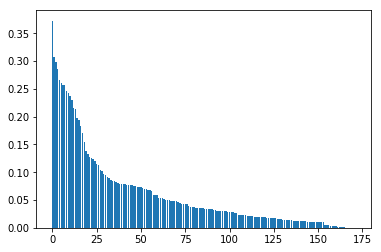

In [28]:
plt.bar(x=range(len(all_IV)), height = all_IV)
plt.show()

In [29]:
### (ii) check the collinearity of any pair of the features with WOE after (i)
# 看各个变量WOE值之间的相关性

var_IV_selected = {k:var_IV[k] for k in varByIV}
var_IV_sorted = sorted(var_IV_selected.items(), key=lambda d:d[1], reverse = True)
var_IV_sorted = [i[0] for i in var_IV_sorted]

removed_var  = []
roh_thresould = 0.6
for i in range(len(var_IV_sorted)-1):
    if var_IV_sorted[i] not in removed_var:
        x1 = var_IV_sorted[i]+"_WOE"
        for j in range(i+1,len(var_IV_sorted)):
            if var_IV_sorted[j] not in removed_var:
                x2 = var_IV_sorted[j] + "_WOE"
                roh = np.corrcoef([trainData[x1], trainData[x2]])[0, 1]
                if abs(roh) >= roh_thresould:
                    print('the correlation coeffient between {0} and {1} is {2}'.format(x1, x2, str(roh)))
                    if var_IV[var_IV_sorted[i]] > var_IV[var_IV_sorted[j]]:
                        removed_var.append(var_IV_sorted[j])
                    else:
                        removed_var.append(var_IV_sorted[i])

var_IV_sortet_2 = [i for i in var_IV_sorted if i not in removed_var]
# var_IV_sortet_2为选出的所有值

the correlation coeffient between LogInfo1_60_avg_count_encoding_Bin_WOE and LogInfo1_120_avg_count_encoding_Bin_WOE is 0.6609694517120359
the correlation coeffient between LogInfo1_60_avg_count_encoding_Bin_WOE and LogInfo1_150_avg_count_encoding_Bin_WOE is 0.6263606652103291
the correlation coeffient between LogInfo1_60_avg_count_encoding_Bin_WOE and LogInfo1_90_avg_count_encoding_Bin_WOE is 0.6852669249608784
the correlation coeffient between LogInfo2_150_avg_count_encoding_Bin_WOE and LogInfo2_60_avg_count_encoding_Bin_WOE is 0.6486020014968573
the correlation coeffient between LogInfo2_120_avg_count_encoding_Bin_WOE and LogInfo2_90_avg_count_encoding_Bin_WOE is 0.7722775392279239
the correlation coeffient between LogInfo2_120_avg_count_encoding_Bin_WOE and LogInfo2_180_avg_count_encoding_Bin_WOE is 0.7369409086564629
the correlation coeffient between UserupdateInfo_150_avg_count_encoding_Bin_WOE and UserupdateInfo_180_avg_count_encoding_Bin_WOE is 0.9517967664955206
the correlatio

In [31]:
# 利用线性回归计算VIF，并删去VIF特别大的特征

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
### (iii) check the multi-colinearity according to VIF > 10
for i in range(len(var_IV_sortet_2)):
    x0 = trainData[var_IV_sortet_2[i]+'_WOE']
    x0 = np.array(x0)
    X_Col = [k+'_WOE' for k in var_IV_sortet_2 if k != var_IV_sortet_2[i]]
    X = trainData[X_Col]
    X = np.matrix(X)
    regr = LinearRegression()
    clr= regr.fit(X, x0)
    x_pred = clr.predict(X)
    R2 = 1 - ((x_pred - x0) ** 2).sum() / ((x0 - x0.mean()) ** 2).sum()
    vif = 1/(1-R2)
    if vif > 10:
        print("Warning: the vif for {0} is {1}".format(var_IV_sortet_2[i], vif))

# Step 5: 应用逻辑回归模型

In [32]:
import statsmodels.api as sm

In [33]:
import pandas as pd
import datetime
import collections
import numpy as np
import numbers
import random
import sys
import pickle
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from importlib import reload
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegressionCV

In [34]:
trainData['target'] = trainData['target'].convert_objects(convert_numeric=True)
trainData = trainData.dropna(subset=['target'])   # 存在着空值，后面报错了，所以要把空值给删了

multi_analysis = [i+'_WOE' for i in var_IV_sortet_2]
y = trainData['target']
X = trainData[multi_analysis].copy()
X['intercept'] = [1]*X.shape[0]

C:\Users\Alan_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [35]:
LR = sm.Logit(y, X).fit()
summary = LR.summary2()
pvals = LR.pvalues.to_dict()
params = LR.params.to_dict()

Optimization terminated successfully.
         Current function value: 0.235058
         Iterations 8


In [36]:
#发现有变量不显著，因此需要单独检验显著性
varLargeP = {k: v for k,v in pvals.items() if v >= 0.1}     # 对p值大于0.1的特征，进行单独的回归
varLargeP = sorted(varLargeP.items(), key=lambda d:d[1], reverse = True)
varLargeP = [i[0] for i in varLargeP]
p_value_list = {}
for var in varLargeP:
    X_temp = trainData[var].copy().to_frame()
    X_temp['intercept'] = [1] * X_temp.shape[0]
    LR = sm.Logit(y, X_temp).fit()
    p_value_list[var] = LR.pvalues[var]
for k,v in p_value_list.items():
    print("{0} has p-value of {1} in univariate regression".format(k,v))

Optimization terminated successfully.
         Current function value: 0.298582
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.303512
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.301106
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.301651
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.303856
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304683
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.302208
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302265
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.304656
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.303803
  

In [ ]:
#发现有变量的系数为正，因此需要单独检验正确性
varPositive = [k for k,v in params.items() if v >= 0]
coef_list = {}
for var in varPositive:
    X_temp = trainData[var].copy().to_frame()
    X_temp['intercept'] = [1] * X_temp.shape[0]
    LR = sm.Logit(y, X_temp).fit()
    coef_list[var] = LR.params[var]
for k,v in coef_list.items():
    print("{0} has coefficient of {1} in univariate regression".format(k,v))

In [37]:
# 前面检验之后，发现所有变量一元回归都没问题，说明了要处理多重共线问题

# multi_analysis已经是按照iv值排序了
# 先把iv值较大的入模，再一个一个入模，有问题的就删掉

selected_var = [multi_analysis[0]]
for var in multi_analysis[1:]:
    try_vars = selected_var+[var]
    X_temp = trainData[try_vars].copy()
    X_temp['intercept'] = [1] * X_temp.shape[0]
    LR = sm.Logit(y, X_temp).fit()
    #summary = LR.summary2()
    pvals, params = LR.pvalues, LR.params
    del params['intercept']
    if max(pvals)<0.1 and max(params)<0:
        selected_var.append(var)

Optimization terminated successfully.
         Current function value: 0.288652
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287174
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276766
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.270234
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.268855
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.267357
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.266594
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.262018
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.261961
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.261077
  

In [38]:
X_temp = trainData[selected_var].copy()

In [39]:
y_temp = y.copy()

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_temp,y_temp)

y_pred = lr.predict(X_temp)
roc_auc_score(y_temp, y_pred)

C:\Users\Alan_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5662095802450196

In [41]:
def DeivdedByZero(nominator, denominator):
    if denominator == 0:
        return 0
    else:
        return nominator*1.0/denominator

In [42]:
def Prob2Score(prob, basePoint, PDO):
    #将概率转化成分数且为正整数
    y = np.log(DeivdedByZero(prob,(1-prob)))
    return int(basePoint+(PDO/np.log(2))*(-y))

In [43]:
### 计算KS值
def KS(df, score, target):
    '''
    :param df: 包含目标变量与预测值的数据集
    :param score: 得分或者概率
    :param target: 目标变量
    :return: KS值
    '''
    total = df.groupby([score])[target].count()
    bad = df.groupby([score])[target].sum()
    all = pd.DataFrame({'total':total, 'bad':bad})
    all['good'] = all['total'] - all['bad']
    all[score] = all.index
    all = all.sort_values(by=score,ascending=True)
    all.index = range(len(all))
    all['badCumRate'] = all['bad'].cumsum()/ all['bad'].sum()
    all['goodCumRate'] = all['good'].cumsum()/ all['good'].sum()
    KS = all.apply(lambda x: x.badCumRate - x.goodCumRate, axis=1)
    return KS

In [44]:
y_pred = lr.predict_proba(X_temp)[:,1]
y_pred = list(y_pred)
scores = list(map(lambda x: Prob2Score(x, 500, 100), y_pred))
scorecard = pd.DataFrame({'y_pred':y_pred, 'y_real':list(trainData['target']),'score':scores})

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   3.,   2.,   1.,
          0.,   0.,   3.,   3.,   1.,   2.,   3.,   3.,   3.,   3.,   4.,
          1.,   7.,   9.,   3.,  13.,   7.,  16.,  13.,  25.,  44.,  51.,
         62.,  74., 101., 119., 199., 216., 282., 334., 381., 456., 523.,
        636., 674., 606., 708., 742., 732., 727., 716., 651., 561., 549.,
        521., 424., 420., 356., 304., 243., 221., 160., 148., 128., 100.,
         78.,  57.,  47.,  52.,  36.,  23.,  31.,  25.,  26.,  10.,   9.,
          6.,   5.,   2.,   3.,   5.,   1.,   1.,   5.,   1.,   4.,   1.,
          2.]), array([-6.97000e+02, -6.70210e+02, -6.43420e+02, -6.16630e+02,
        -5.89840e+02, -5.63050e+02, -5.36260e+02, -5.09470e+02,
        -4.82680e+02, -4.55890e+02, -4.29100e+02, -4.02310e+02,
        -3.75520e+02, -3.48730e+02, -3.21940e+02, -2.95150e+02,
        -2.68360e+02, -2.41570e+02, -2.14780e+02, -1.87990e+02,

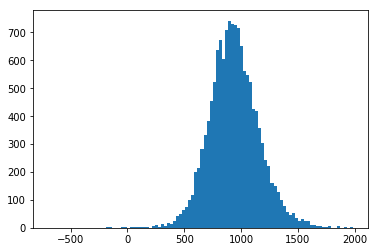

In [45]:
plt.hist(list(scores),bins=100)

In [46]:
max(KS(scorecard,'score','y_real'))


C:\Users\Alan_\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 'score' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


0.4904595794459733

# 进行交叉验证，看一下效果

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_temp,y_temp, test_size=0.3,random_state=2333)

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
roc_auc_score(y_test, y_pred)

C:\Users\Alan_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5746539136721087

In [49]:
y_pred = lr.predict_proba(X_test)[:,1]
y_pred = list(y_pred)
scores = list(map(lambda x: Prob2Score(x, 500, 100), y_pred))
scorecard = pd.DataFrame({'y_pred':y_pred, 'y_real':list(y_test),'score':scores})

In [50]:
max(KS(scorecard,'score','y_real'))

C:\Users\Alan_\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 'score' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


0.4882167429987657

In [75]:
n=6
list_value = [1,3,2,4,6,5]

In [54]:
i=0

In [55]:
range(6-(i+1))

range(0, 5)

In [70]:
list_value[0:0+i+1]

[1]

In [76]:
max_min = []
for i in range(6):
    max_value = []
    for j in range(6-i):
        sub_list = list_value[j:j+i+1]
        sub_list_max = max(sub_list)
        max_value.append(sub_list_max)
    max_min.append(min(max_value))    

In [77]:
max_min

[1, 3, 3, 4, 6, 6]

In [100]:
max_min = []
for i in range(6):
    max_value = []
    for j in range(6-i):
        sub_list = list_value[j:j+i+1]
        sub_list_max = max(sub_list)
        max_value.append(sub_list_max)
    max_min.append(min(max_value))  

In [96]:
max_value

[6]